### Importing dependencies and loading data

In [106]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
# Load dataset
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.shape

(1599, 12)

### Exploratory Data Analysis

In [13]:
# Calculate summary statistics
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
# Check for missing/ null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
# Check that the data types of the features are suitable for the modelling method(regression)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Text(0.5, 1.0, 'Correlation between wine features')

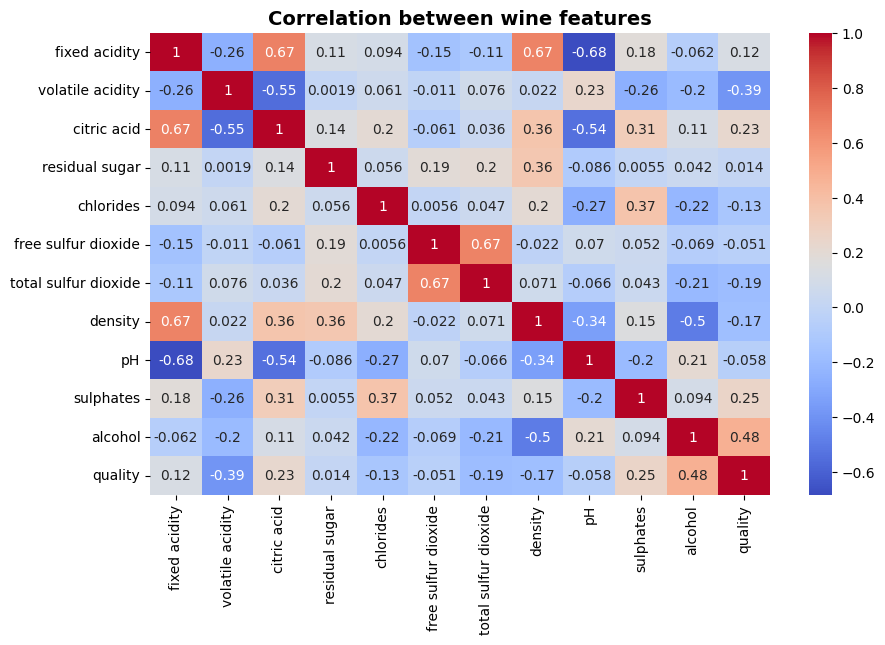

In [89]:
# Check correlation of features with respect to the target variable
corr = data.corr()
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr,ax=ax, annot= True, cmap='coolwarm')
plt.title('Correlation between wine features', fontsize=14, fontweight='semibold')

Text(0.5, 1.0, 'Relationship between wine quality & alcohol content')

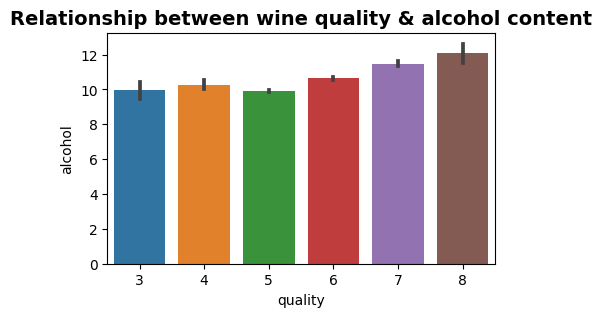

In [90]:
# Check relationship between wine quality and alcohol content
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'alcohol', data = data)
plt.title('Relationship between wine quality & alcohol content', fontsize=14, fontweight='semibold')

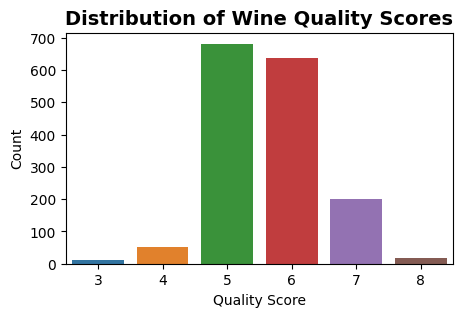

In [91]:
# Check for balance or imbalance in the dataset
fig = plt.figure(figsize = (5,3))
sns.countplot(x='quality', data=data)  # visualize the distribution of wine quality scores
plt.title('Distribution of Wine Quality Scores', fontsize=14, fontweight='semibold')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Percentage(%)')

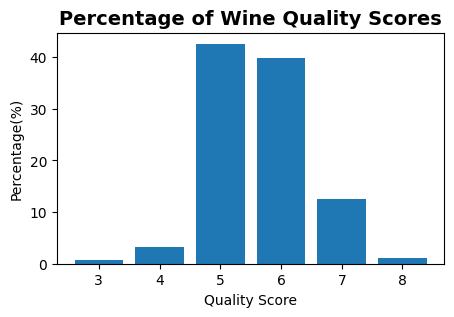

In [92]:
# Check imbalance of quality scores by percentage

# Count the number of each quality score
quality_counts = data['quality'].value_counts()

# Calculate the percentage of each quality score
quality_percents = quality_counts / quality_counts.sum() * 100

# Plot the percentage of each quality score
fig = plt.figure(figsize = (5,3))
plt.bar(quality_percents.index, quality_percents.values)
plt.title('Percentage of Wine Quality Scores', fontsize=14, fontweight='semibold')
plt.xlabel('Quality Score')
plt.ylabel('Percentage(%)')

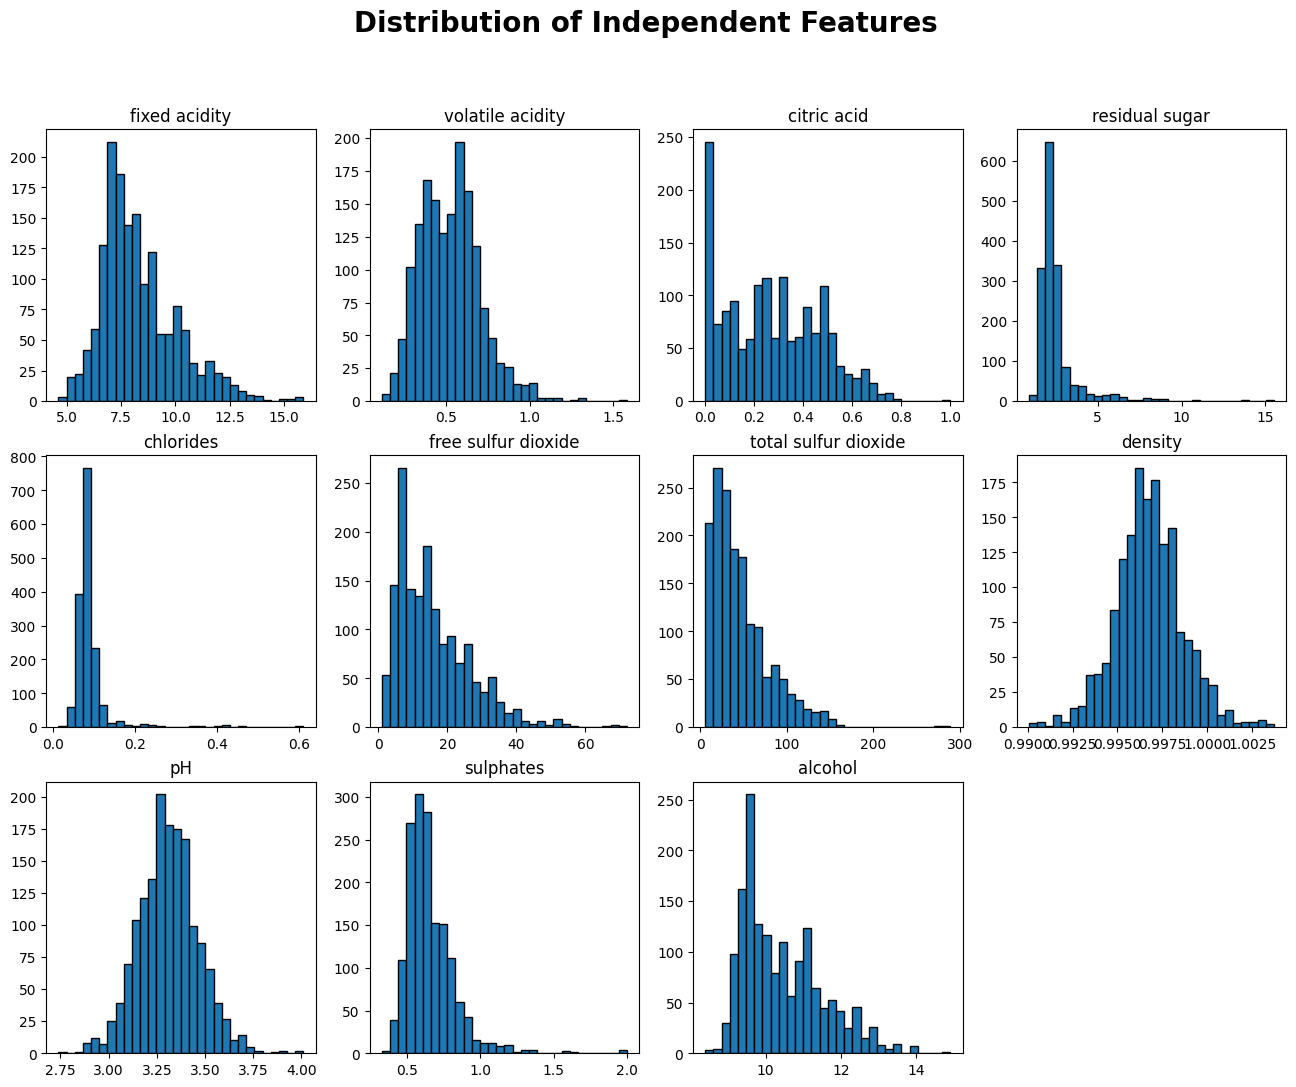

In [102]:
# Visualise the distribution of the independent features(variables)
from scipy.stats import probplot

X = data.drop(columns=['quality'])

# Create a histogram for each feature (X contains only the independent variables)
n_cols = X.shape[1]
n_rows = int(n_cols/4) + 1

fig, axs = plt.subplots(n_rows, 4, figsize=(16, 4*n_rows))
fig.suptitle('Distribution of Independent Features', fontsize=20, fontweight='semibold')
for i, ax in enumerate(axs.flat):
    if i < n_cols:
        ax.hist(X.iloc[:, i], bins=30, edgecolor='black')
        ax.set_title(X.columns[i])
    else:
        ax.set_visible(False)

plt.show()


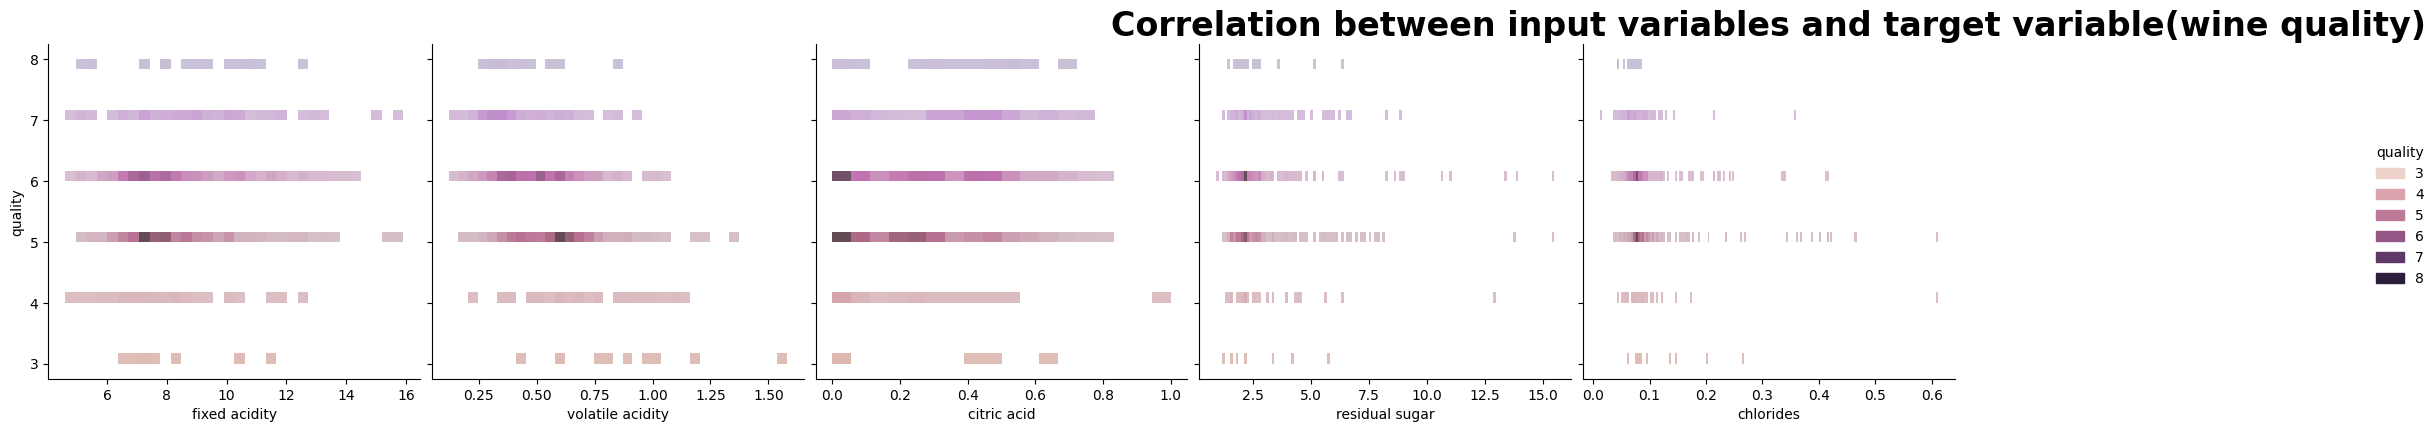

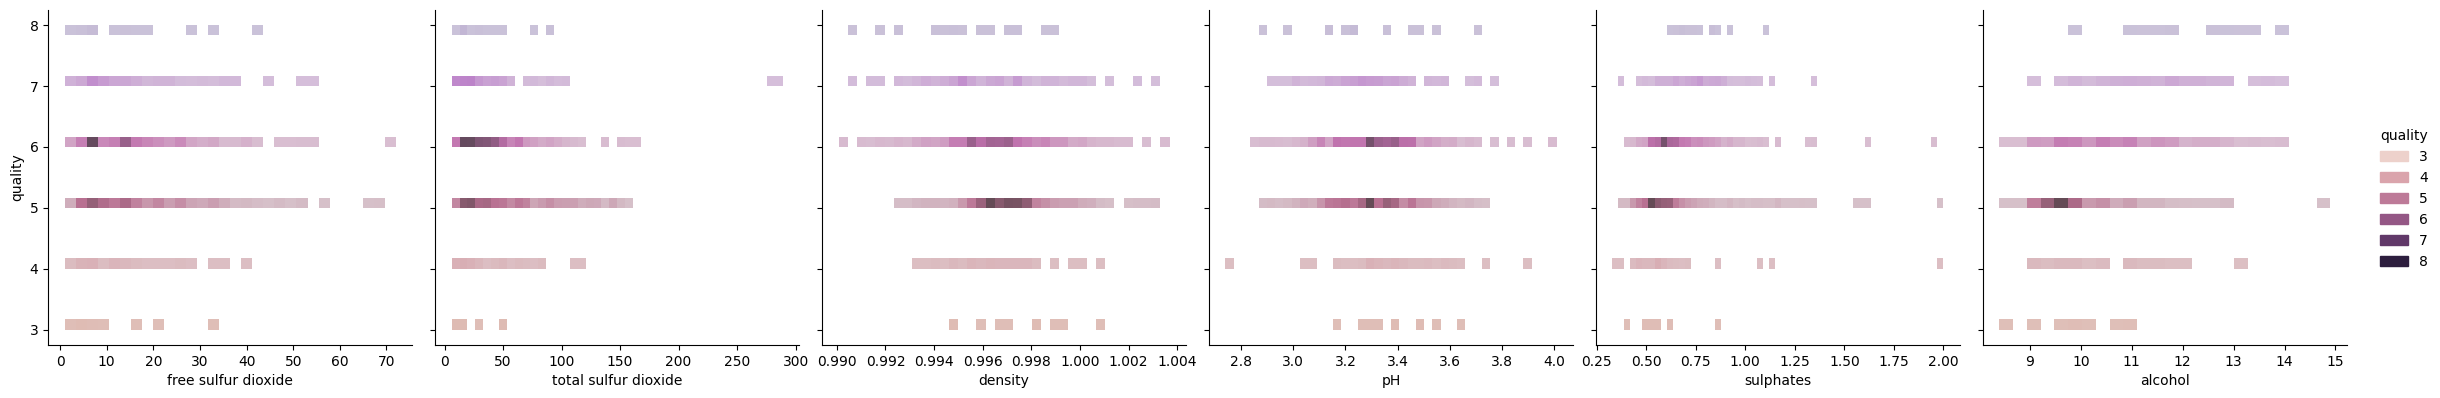

In [69]:
# Visualize the correlation between input variables and target variable
# fig = plt.figure(figsize = (20,16))
sns.pairplot(data=data, y_vars=['quality'], x_vars=data.columns[0:5], kind='hist', height=4, aspect=1, hue='quality')
plt.title('Correlation between input variables and target variable(wine quality)', fontsize=24, fontweight='semibold')
sns.pairplot(data=data, y_vars=['quality'], x_vars=data.columns[5:-1], kind='hist', height=4, aspect=1, hue='quality')


### Data Modelling

In [103]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.2, random_state=0)


##### LINEAR REGRESSION

In [104]:
# perform data modelling with linear regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [105]:
# predict the target variable for the testing set using the linear regression model
y_pred_linear_reg = linear_reg_model.predict(X_test)

In [108]:
# evaluate the performance of the linear regression model
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
rmse_linear_reg = np.sqrt(mse_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

# Show evaluation scores
print("LINEAR REGRESSION EVALUATION METRICS")
print("Mean absolute error: {:.4f}".format(mae_linear_reg))
print("Mean squared error: {:.4f}".format(mse_linear_reg))
print("Root mean squared error: {:.4f}".format(rmse_linear_reg))
print("R2 score: {:.4f}".format(r2_linear_reg))

LINEAR REGRESSION EVALUATION METRICS
Mean absolute error: 0.4696
Mean squared error: 0.3845
Root mean squared error: 0.6201
R2 score: 0.3284


##### RIDGE REGRESSION

In [113]:
# perform data modelling with ridge regression
ridge_reg_model = Ridge(alpha=0.1)
ridge_reg_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [114]:
# predict the target variable for the testing set using the ridge regression model
y_pred_ridge_reg = ridge_reg_model.predict(X_test)

In [115]:
# evaluate the performance of the ridge regression model
mae_ridge_reg = mean_absolute_error(y_test, y_pred_ridge_reg)
mse_ridge_reg = mean_squared_error(y_test, y_pred_ridge_reg)
rmse_ridge_reg = np.sqrt(mse_ridge_reg)
r2_ridge_reg = r2_score(y_test, y_pred_ridge_reg)

# Show evaluation scores
print("RIDGE REGRESSION EVALUATION METRICS")
print("Mean absolute error: {:.4f}".format(mae_ridge_reg))
print("Mean squared error: {:.4f}".format(mse_ridge_reg))
print("Root mean squared error: {:.4f}".format(rmse_ridge_reg))
print("R2 score: {:.4f}".format(r2_ridge_reg))

RIDGE REGRESSION EVALUATION METRICS
Mean absolute error: 0.4686
Mean squared error: 0.3826
Root mean squared error: 0.6186
R2 score: 0.3316


##### LASSO REGRESSION

In [116]:
# perform data modelling with lasso regression
lasso_reg_model = Lasso(alpha=0.1)
lasso_reg_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [117]:
# predict the target variable for the testing set using the lasso regression model
y_pred_lasso_reg = lasso_reg_model.predict(X_test)

In [119]:
# evaluate the performance of the lasso regression model
mae_lasso_reg = mean_absolute_error(y_test, y_pred_lasso_reg)
mse_lasso_reg = mean_squared_error(y_test, y_pred_lasso_reg)
rmse_lasso_reg = np.sqrt(mse_lasso_reg)
r2_lasso_reg = r2_score(y_test, y_pred_lasso_reg)

# Show evaluation scores
print("LASSO REGRESSION EVALUATION METRICS")
print("Mean absolute error: {:.4f}".format(mae_lasso_reg))
print("Mean squared error: {:.4f}".format(mse_lasso_reg))
print("Root mean squared error: {:.4f}".format(rmse_lasso_reg))
print("R2 score: {:.4f}".format(r2_lasso_reg))

LASSO REGRESSION EVALUATION METRICS
Mean absolute error: 0.5114
Mean squared error: 0.4239
Root mean squared error: 0.6511
R2 score: 0.2595


### MODEL PERFORMANCE COMPARISON

In [120]:
# compare the performance of the three models
print("Linear Regression: RMSE = %.3f, R2 score = %.3f" % (rmse_linear_reg, r2_linear_reg))
print("Ridge Regression: RMSE = %.3f, R2 score = %.3f" % (rmse_ridge_reg, r2_ridge_reg))
print("Lasso Regression: RMSE = %.3f, R2 score = %.3f" % (rmse_lasso_reg, r2_lasso_reg))


Linear Regression: RMSE = 0.620, R2 score = 0.328
Ridge Regression: RMSE = 0.619, R2 score = 0.332
Lasso Regression: RMSE = 0.651, R2 score = 0.260


In [122]:
performance = {
                'Algorithm': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
                'MAE': [mae_linear_reg, mae_ridge_reg, mae_lasso_reg], 
                'MSE': [mse_linear_reg, mse_ridge_reg, mse_lasso_reg], 
                'RMSE': [rmse_linear_reg, rmse_ridge_reg, rmse_lasso_reg], 
                'R2': [r2_linear_reg, r2_ridge_reg, r2_lasso_reg]
             }

performance_df = pd.DataFrame(performance)
print(performance_df)

           Algorithm       MAE       MSE      RMSE        R2
0  Linear Regression  0.469633  0.384471  0.620057  0.328389
1   Ridge Regression  0.468638  0.382631  0.618572  0.331604
2   Lasso Regression  0.511414  0.423894  0.651071  0.259524


### CHECKING ASSUMPTIONS OF LINEAR REGRESSION

##### Assumption 1: 

Linearity: There is a linear relationship between the independent variable(s) and the dependent variable.


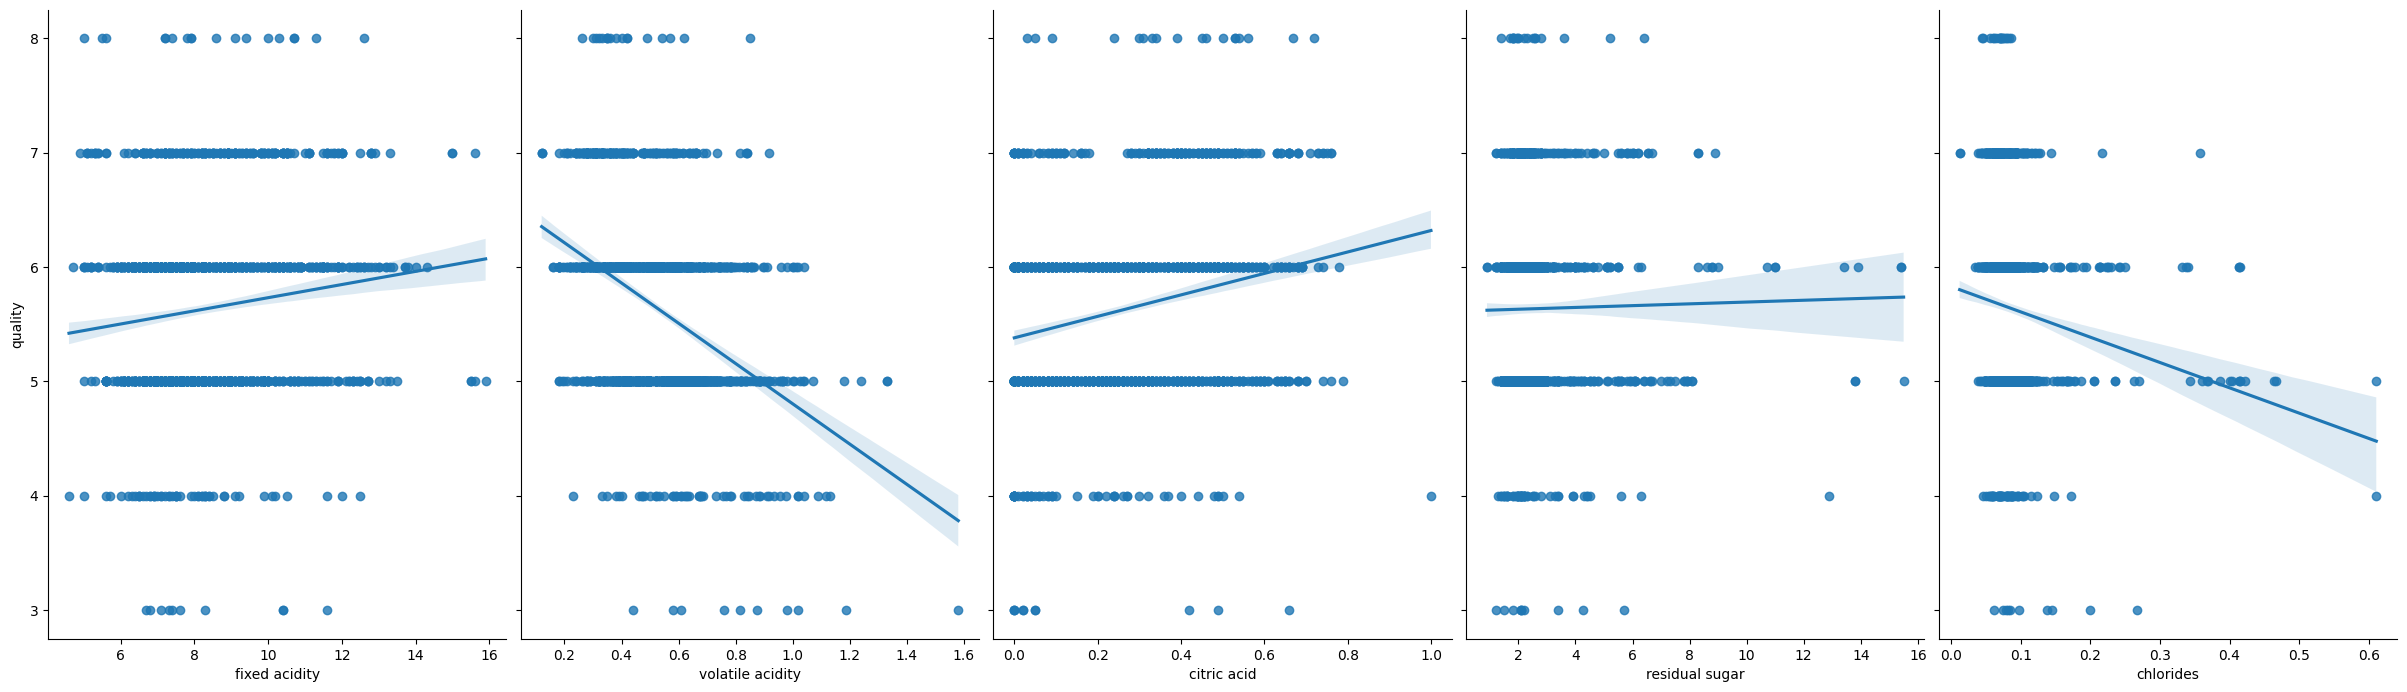

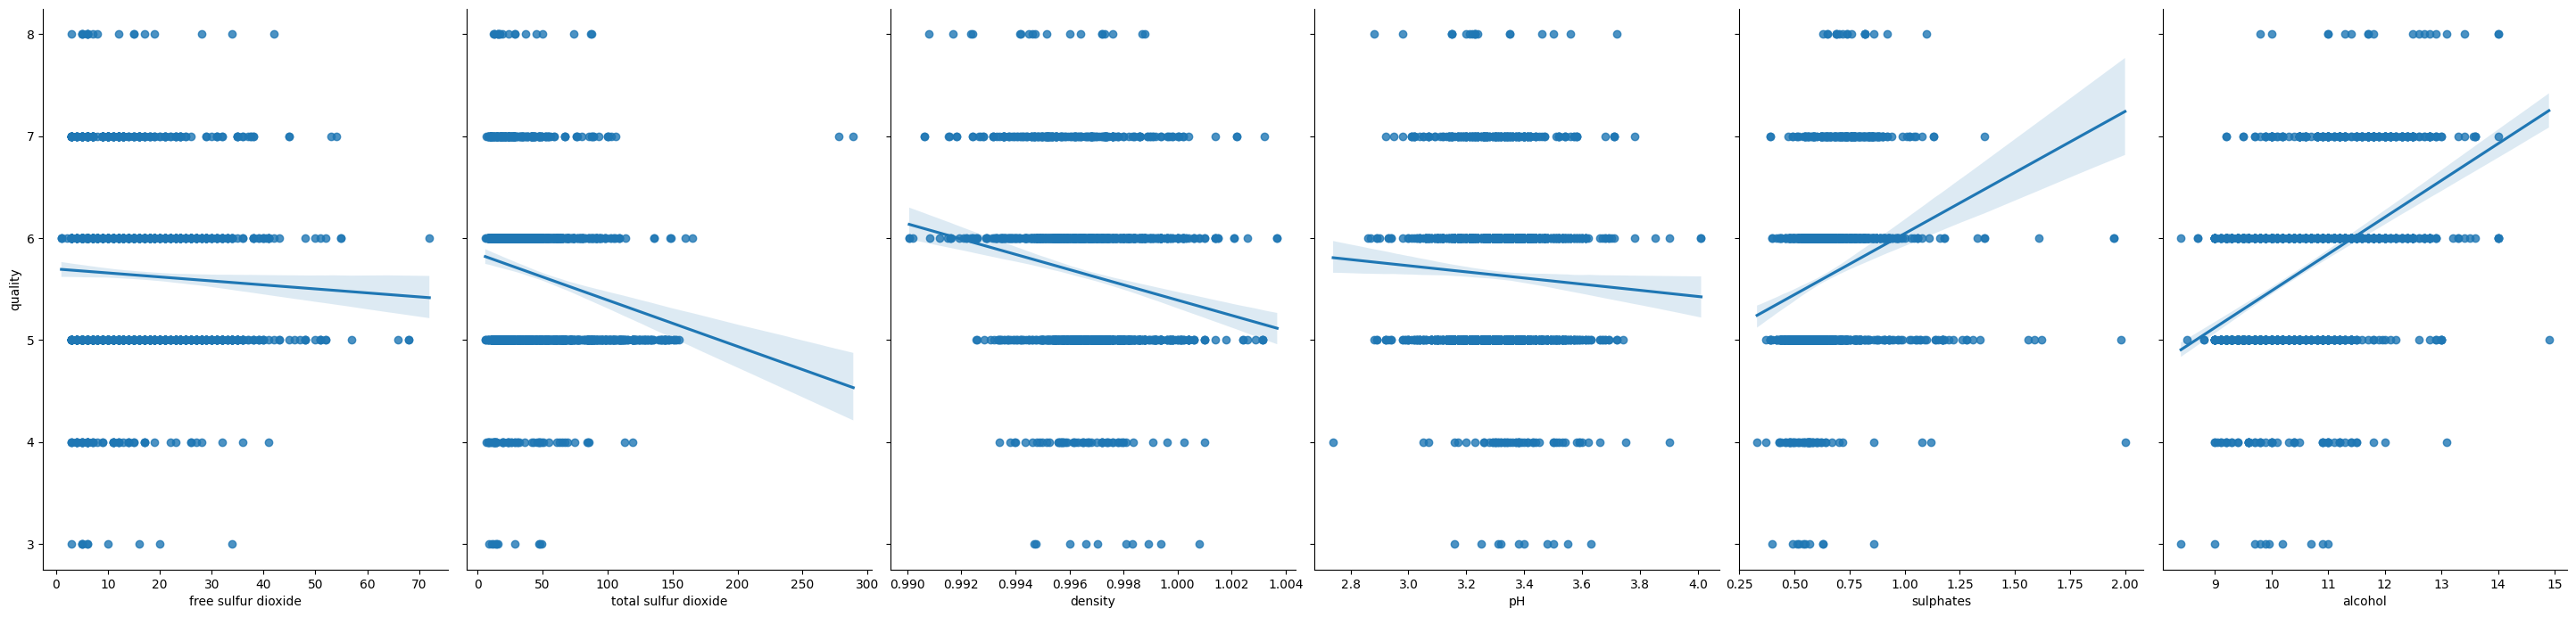

In [135]:
# Assumption 1: Linearity
sns.pairplot(data=data, y_vars=['quality'], x_vars=data.columns[0:5], kind='reg', size=7, aspect=0.7)
sns.pairplot(data=data, y_vars=['quality'], x_vars=data.columns[5:-1], kind='reg', size=7, aspect=0.7)


##### Assumption 2.

Independence: The observations in the dataset must be independent of each other.


##### Assumption 3.

Homoscedasticity: The variance of the errors (residuals) should be constant across all values of the independent variable(s).

In [136]:
# !pip install statsmodels

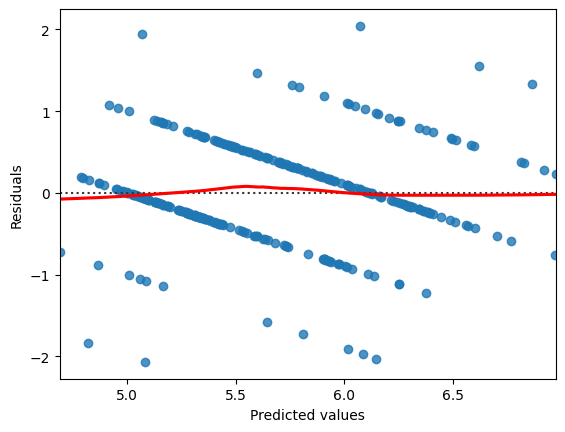

In [137]:
# Assumption 3: Homoscedasticity
sns.residplot(x=y_pred_linear_reg, y=y_test - y_pred_linear_reg, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

##### Assumption 4.

Normality

<AxesSubplot: xlabel='quality', ylabel='Count'>

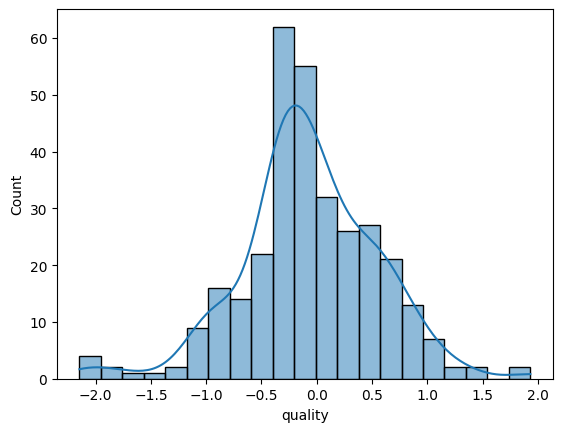

In [125]:
# Assumption 4: Normality
sns.histplot(y_test - y_pred_linear_reg, kde=True)